# Lasso Regression

train accuracy:	 0.4193950807145519
test accuracy:	 0.30402809171705725
present Alpha:	 525.0364139057991
[-0.          1.96003528  0.          0.          0.57006876  2.62490231
 -0.         -0.40711625  1.21421302 -0.          0.5391318   0.39028385
  0.          0.07878797  0.20508733  0.        ]
(100,)
(16, 100)


C:\Users\Alienware\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


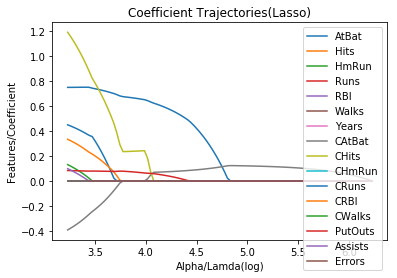

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

####### Reading file
data = pd.read_csv('./dataset/Hitters.csv')
# print(data.head())

##### Simple data cleaning
data = data.fillna(value=0)
# print(data['Salary'])

###### Attributes classification
X = data.drop(columns=['League','Division','NewLeague', 'Salary']) # X has 16 features
X = X.drop(X.columns[0], axis=1)
y = data['Salary']
# print(X.head(),y.head())

##### Train & Test set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

##### Modelling and Fitting
LassoReg = linear_model.LassoCV()
LassoReg.fit(X_train, y_train)
print('train accuracy:\t', LassoReg.score(X_train, y_train))
print('test accuracy:\t', LassoReg.score(X_test, y_test))
print('present Alpha:\t', LassoReg.alpha_)
print(LassoReg.coef_)
# print(LassoReg.coef_) # type -> numpy.ndarray

##### Coefficient Trajectories Plotting
alphas, coefs, _ = lasso_path(X_train, y_train)
print (alphas.shape)
print (coefs.shape)


lgalphas = np.log10(alphas)
count_pre = 0

for i in range(16):
    plt.plot(lgalphas, coefs[i,:], label = X.columns[i])

plt.legend(loc='upper right')
plt.title("Coefficient Trajectories(Lasso)")
plt.xlabel("Alpha/Lamda(log)")
plt.ylabel("Features/Coefficient")
plt.show()


# Ridge Regression

train accuracy:	 0.2719213478289779
test accuracy:	 0.34741655060431853
optimal Alpha:	 1291549.665014888
(100,)
(100, 16)


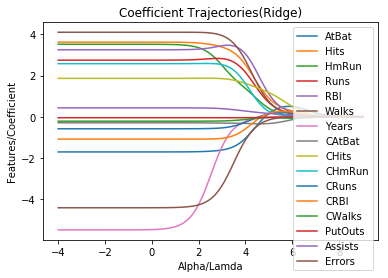

In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

####### Reading file
data = pd.read_csv('./dataset/Hitters.csv')
# print(data.head())

##### Simple data cleaning
data = data.fillna(value=0)
# print(data['Salary'])

###### Attributes classification
X = data.drop(columns=['League','Division','NewLeague', 'Salary']) # X has 16 features
X = X.drop(X.columns[0], axis=1)
y = data['Salary']
# print(X.head(),y.head())

##### Train & Test set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

##### Modelling and Fitting
alphas_r = np.logspace(-4,9,alpha_num)
RidgeReg = linear_model.RidgeCV(alphas=alphas_r)
RidgeReg.fit(X_train, y_train)
print('train accuracy:\t', RidgeReg.score(X_train, y_train))
print('test accuracy:\t', RidgeReg.score(X_test, y_test))
print('optimal Alpha:\t', RidgeReg.alpha_)
# print(RidgeReg.coef_)
# print(RidgeReg.coef_) # type -> numpy.ndarray

##### Coefficient Trajectories Collecting & Plotting
alpha_num = 100
alphas_r = np.logspace(-4,9,alpha_num)
print(alphas_r.shape)
coefs_r = np.zeros((100,16), dtype=np.double)
for i in range(alphas_r.shape[0]):
    a = alphas_r[i]
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_r[i,:] = ridge.coef_

print(coefs_r.shape)
lgalphas_r = np.log10(alphas_r)
coefs_r_o = coefs_r*2
for i in range(16):
    plt.plot(lgalphas_r, coefs_r[:,i], label = X.columns[i])
# plt.plot(lgalphas_r, coefs_r)
plt.legend(loc='upper right')
plt.title("Coefficient Trajectories(Ridge)")
plt.xlabel("Alpha/Lamda")
plt.ylabel("Features/Coefficient")
plt.show()